# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

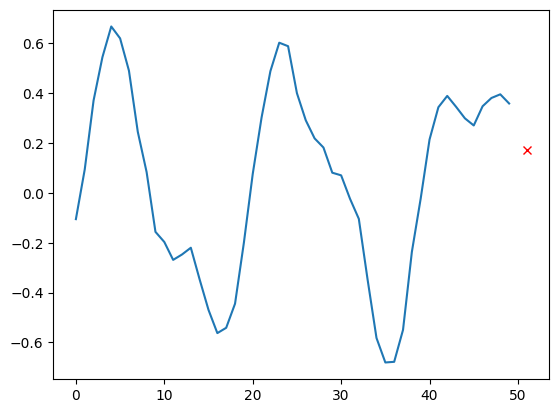

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [9]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [10]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 4s 8ms/step - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0081 - val_mean_squared_error: 0.0081


In [12]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

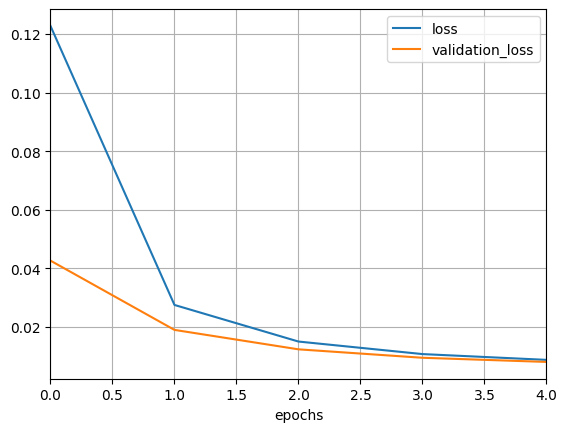

In [13]:
plot_function(history_linear)

In [14]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.008174491114914417
Test MSE:  0.008174491114914417


### 1.5 Simple RNN Model

In [15]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [16]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [17]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 9s 37ms/step - loss: 0.2054 - mean_squared_error: 0.2054 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 2/5
219/219 [==============================] - 7s 34ms/step - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 3/5
219/219 [==============================] - 7s 31ms/step - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 4/5
219/219 [==============================] - 8s 38ms/step - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 5/5
219/219 [==============================] - 7s 33ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0469 - val_mean_squared_error: 0.0469


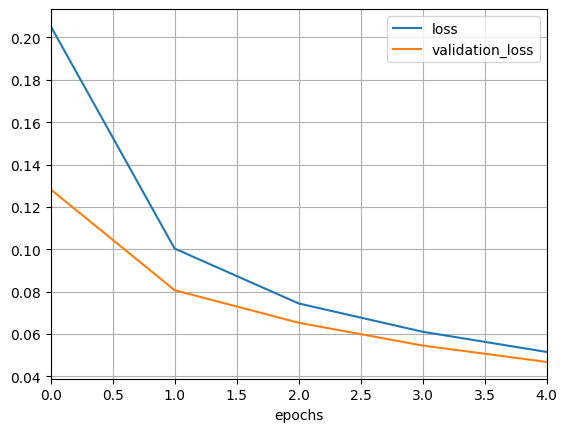

In [18]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [19]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [20]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [21]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 31s 128ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2/5
219/219 [==============================] - 29s 131ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3/5
219/219 [==============================] - 28s 126ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/5
219/219 [==============================] - 29s 131ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/5
219/219 [==============================] - 28s 127ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


In [22]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0033335546031594276
Test MSE:  0.0033335546031594276


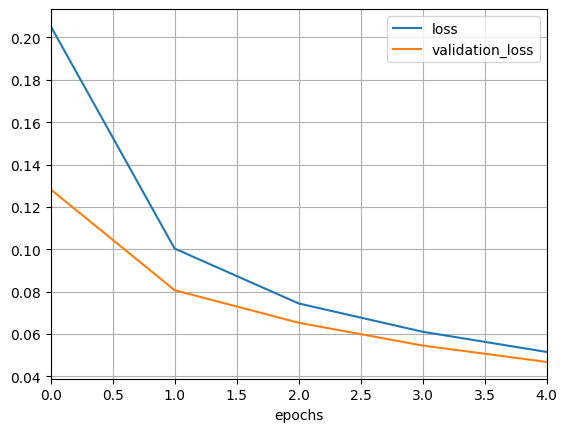

In [23]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [8]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


### 2.2 - Dataset examination

In [26]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 0s 0us/step


In [27]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [28]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [29]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [31]:
X_train

array([[   1,   14,   22, ...,   71,   43,  530],
       [   1,  194, 1153, ..., 9837,  131,  152],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ..., 1119, 1574,    7],
       [   1, 1446, 7079, ...,   12,    9,   23],
       [   1,   17,    6, ..., 1739,   22,    4]], dtype=int32)

In [32]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [33]:
optimizer = Adam(learning_rate = 0.001)

In [34]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [35]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 163s 257ms/step - loss: 0.7001 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5058
Epoch 2/5
625/625 [==============================] - 157s 251ms/step - loss: 0.6998 - accuracy: 0.5018 - val_loss: 0.6944 - val_accuracy: 0.5062
Epoch 3/5
625/625 [==============================] - 156s 250ms/step - loss: 0.6954 - accuracy: 0.5001 - val_loss: 0.6930 - val_accuracy: 0.5062
Epoch 4/5
625/625 [==============================] - 162s 260ms/step - loss: 0.6954 - accuracy: 0.5013 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 5/5
625/625 [==============================] - 146s 233ms/step - loss: 0.6950 - accuracy: 0.4972 - val_loss: 0.7008 - val_accuracy: 0.5062


In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.7025137543678284
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

Try to modify RNN to LTSM and GRU


In [37]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [38]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

In [39]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [40]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [41]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [42]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [44]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [45]:
optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 38s 55ms/step - loss: 0.6646 - accuracy: 0.6037 - val_loss: 0.6551 - val_accuracy: 0.6304
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 0.6854 - accuracy: 0.5431 - val_loss: 0.6870 - val_accuracy: 0.5458
Epoch 3/5
625/625 [==============================] - 12s 19ms/step - loss: 0.5822 - accuracy: 0.6773 - val_loss: 0.4790 - val_accuracy: 0.7960
Epoch 4/5
625/625 [==============================] - 11s 18ms/step - loss: 0.4294 - accuracy: 0.8067 - val_loss: 0.4279 - val_accuracy: 0.8034
Epoch 5/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3939 - accuracy: 0.8259 - val_loss: 0.4681 - val_accuracy: 0.7718


In [47]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.4571323096752167
Test accuracy:  78.02799940109253 %


Import GRU


In [84]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [85]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

In [86]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [87]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [88]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [89]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [90]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [94]:
optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [95]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 37s 55ms/step - loss: 0.5843 - accuracy: 0.6672 - val_loss: 0.4622 - val_accuracy: 0.7900
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.4046 - accuracy: 0.8211 - val_loss: 0.4155 - val_accuracy: 0.8306
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3555 - accuracy: 0.8461 - val_loss: 0.3843 - val_accuracy: 0.8298
Epoch 4/5
625/625 [==============================] - 11s 17ms/step - loss: 0.3282 - accuracy: 0.8590 - val_loss: 0.3858 - val_accuracy: 0.8270
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3081 - accuracy: 0.8708 - val_loss: 0.3896 - val_accuracy: 0.8302


In [82]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.12073712050914764
Test accuracy:  83.20800065994263 %


**OUTCOME Results**

1.   Použítím RNN dostaneme model s pomalým trainingem a velice špatným výsledkem accuracy 50%. RNN model nezvládá delší texty, je lepší využít LSTM a GRU
2.   použitím LSTM dostáváme výsledky daleko rychleji a accuracy okolo 78%

3. Při implementování modelu GRU se model trenuje přibližnou rychlostí jako LSTM a test accuracy okolo 83.17%, což jej činí jako nejlepší model z těchto tří možných

Tip: Navyšování délky textu se nijak zvláště nepodepíše na accuracy, navýšením počtem známých slov o 1000 zvýší accuracy o 0.1%, což taky nečíní žádný významný rozdíl.

